<a href="https://colab.research.google.com/github/TanD18/Exploratory-Data-Analysis-on-Zomato-Data/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Dependencies/Library

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.1 MB/s 
     |████████████████████████████████| 16.7 MB 251 kB/s 
     |████████████████████████████████| 6.3 MB 23.8 MB/s 


In [ ]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopy
import geopandas as gpd
import plotly.express as px
import torch
import seaborn as sns
import re
from warnings import filterwarnings
filterwarnings('ignore')

##First Look into the Data

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: zomato.csv              


In [ ]:
df=pd.read_csv('/content/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.iloc[0]

url                            https://www.zomato.com/bangalore/jalsa-banasha...
address                        942, 21st Main Road, 2nd Stage, Banashankari, ...
name                                                                       Jalsa
online_order                                                                 Yes
book_table                                                                   Yes
rate                                                                       4.1/5
votes                                                                        775
phone                                             080 42297555\r\n+91 9743772233
location                                                            Banashankari
rest_type                                                          Casual Dining
dish_liked                     Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
cuisines                                          North Indian, Mughlai, Chinese
approx_cost(for two people) 

In [ ]:
df.shape

(51717, 17)

In [ ]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
#Removing string sequence ',' from approx_cost(for two people) column Eg: 1,000->1000
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')

##Null Value Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
#Total number of Restaurants
df['name'].unique().shape

(8792,)

In [ ]:
df[df.columns[5]].isnull().sum()

7775

In [ ]:
#Finding Null total number of values
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
#Features with containing atleast 1 null value
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [ ]:
#Missing Value Percentage on each attribute
print("Missing Value Percentage: ")
for feature in feature_na:
  print(feature," : ",np.round(df[feature].isnull().sum()/len(df)*100,4))

Missing Value Percentage: 
rate  :  15.0337
phone  :  2.3358
location  :  0.0406
rest_type  :  0.4389
dish_liked  :  54.2916
cuisines  :  0.087
approx_cost(for two people)  :  0.669


##Drop rows with null value in **rate** and **approx_cost(for two people)**

In [ ]:
#Removing records with null value in the 'rate' and 'approx_cost(for two people)' columns
df.dropna(axis=0,subset=['rate'],inplace=True)
df.dropna(axis=0,subset=['approx_cost(for two people)'],inplace=True)
len(df)

43690

##Converting **rate** from string to integer

In [ ]:
def split_(x):
  return x.split('/')[0]

In [ ]:
#Removing '/' from the 'rate' column value
df['rate']=df['rate'].apply(split_)
len(df)

43690

In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df1=df.loc[df['rate'].isin(['NEW','-'])]
df1.index

Int64Index([   72,    75,   110,   130,   131,   132,   143,   144,   154,
              276,
            ...
            51386, 51393, 51500, 51575, 51576, 51585, 51586, 51603, 51604,
            51605],
           dtype='int64', length=2272)

In [ ]:
df.drop(axis=0,index=df.loc[df['rate'].isin(['NEW','-'])].index,inplace=True)

In [ ]:
#Converting Rate column value from string to float type
df['rate']=df['rate'].astype('float')

In [ ]:
#Converting approx_cost column value from string to float type
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('float')

##Chain and Solo Restaurants

In [ ]:
#There are many records which have similar value on every column except 'listed_in(city)', we treat them as duplicate and remove them
df=df.drop_duplicates(
  subset = ['name', 'address'],
  keep = 'last').reset_index(drop = True)

In [ ]:
#Finding Restaurants groups with atleast 2 outlets
restaurants=df.groupby('name')['rate'].count()
chain_res=restaurants.loc[restaurants>1]
chain_res

name
1522 - The Pub                      3
1947                                4
3B's - Buddies, Bar & Barbecues     2
7 Plates                            4
99 Pancakes                         2
                                   ..
Zee5 Loft                           2
Zeeshan                             5
Zu's Doner Kebaps                   2
eat.fit                            10
nu.tree                             3
Name: rate, Length: 976, dtype: int64

In [ ]:
#Finding Restaurants groups with just 1 outlet
restaurants=df.groupby('name')['rate'].count()
solo_res=restaurants.loc[restaurants==1]
solo_res

name
#FeelTheROLL                                    1
#L-81 Cafe                                      1
#refuel                                         1
1000 B.C                                        1
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            1
                                               ..
de Ranthal                                      1
i-Bar - The Park Bangalore                      1
iFruit Live Ice Creams                          1
iSpice Resto Cafe                               1
re:cess - Hilton Bangalore Embassy GolfLinks    1
Name: rate, Length: 5651, dtype: int64

In [ ]:
#Creating data frames with chain and solo restaurants
df_chain=df[df['name'].isin(chain_res.index)].groupby('name')
df_solo=df[df['name'].isin(solo_res.index)].groupby('name')
df_chain['rate'].mean(),df_solo['rate'].mean()

(name
 1522 - The Pub                     4.233333
 1947                               4.000000
 3B's - Buddies, Bar & Barbecues    4.450000
 7 Plates                           3.750000
 99 Pancakes                        4.300000
                                      ...   
 Zee5 Loft                          4.400000
 Zeeshan                            3.180000
 Zu's Doner Kebaps                  3.650000
 eat.fit                            4.280000
 nu.tree                            4.266667
 Name: rate, Length: 976, dtype: float64, name
 #FeelTheROLL                                    3.4
 #L-81 Cafe                                      3.9
 #refuel                                         3.7
 1000 B.C                                        3.2
 100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            3.7
                                                ... 
 de Ranthal                                      3.8
 i-Bar - The Park Bangalore                      3.8
 iFruit Live Ice Creams     

Text(0.5, 1.0, 'Highest Rated Solo Restaurant')

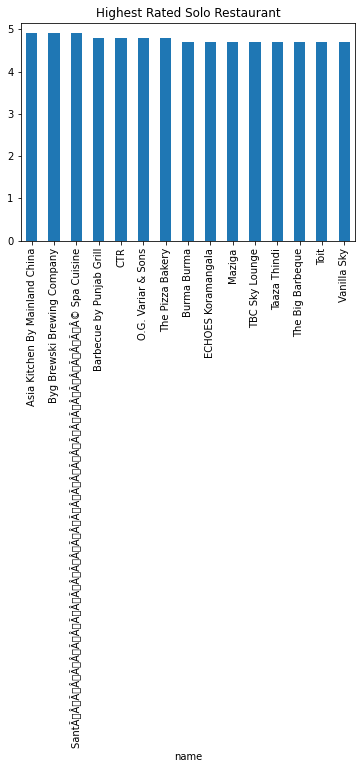

In [ ]:
#Plotting Highest Rated Solo Restaurant
df_solo['rate'].mean().nlargest(15).plot.bar()
plt.title('Highest Rated Solo Restaurant')

Text(0, 0.5, 'Rate')

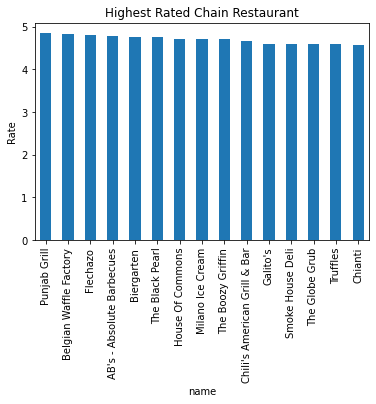

In [ ]:
#Plotting Highest Rated Chain Restaurant
df_chain['rate'].mean().nlargest(15).plot.bar()
plt.title('Highest Rated Chain Restaurant')
plt.ylabel('Rate')

In [ ]:
#Converting 'SeriesGroupBy' object df_solo to data frame object
df_solo_rate=df_solo['rate'].mean().to_frame()
df_solo_rate=df_solo_rate.reset_index()
df_solo_rate.columns=['restaurant','rating']
df_solo_rate

,restaurant,rating
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7
...,...,...
5646,de Ranthal,3.8
5647,i-Bar - The Park Bangalore,3.8
5648,iFruit Live Ice Creams,3.4
5649,iSpice Resto Cafe,3.7


In [ ]:
#Creating dataframe of chain restaurant with its mean rating from all of its outlets/records
df_chain_rate=df_chain['rate'].mean().to_frame()
df_chain_rate=df_chain_rate.reset_index()
df_chain_rate.columns=['restaurant','rating']
df_chain_rate

,restaurant,rating
0,1522 - The Pub,4.233333
1,1947,4.000000
2,"3B's - Buddies, Bar & Barbecues",4.450000
3,7 Plates,3.750000
4,99 Pancakes,4.300000
...,...,...
971,Zee5 Loft,4.400000
972,Zeeshan,3.180000
973,Zu's Doner Kebaps,3.650000
974,eat.fit,4.280000


In [ ]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
6622,i-Bar - The Park Bangalore,3.800000
6623,iFruit Live Ice Creams,3.400000
6624,iSpice Resto Cafe,3.700000
6625,nu.tree,4.266667


###Solo vs Chain Restaurants plots

Median
All restaurants: rating    3.6
dtype: float64 Chain Restaurants: rating    3.65
dtype: float64 Solo Restaurants: rating    3.6
dtype: float64

Mean
 All Restaurants: rating    3.618608
dtype: float64 Chain Restaurants: rating    3.648785
dtype: float64 Solo Restaurants: rating    3.613396
dtype: float64


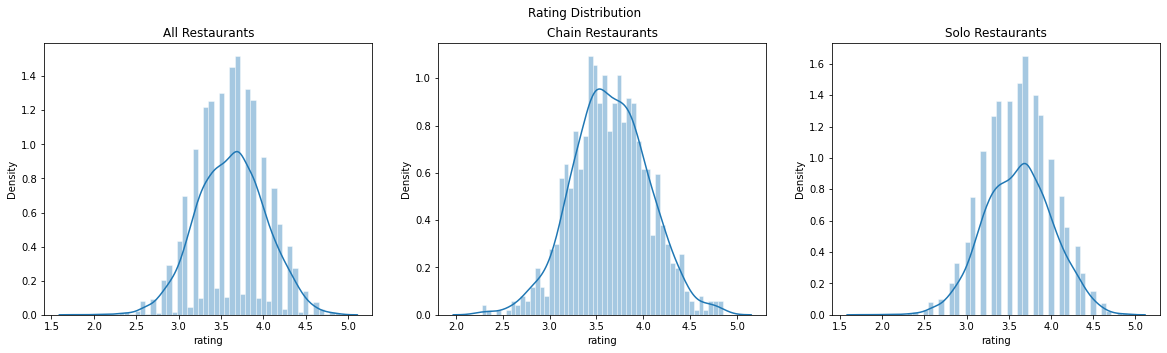

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Rating Distribution')
sns.set_style(style='whitegrid')
sns.distplot(ax=axes[0],a=df_rate['rating'],bins=50)
axes[0].set_title('All Restaurants')
sns.distplot(ax=axes[1],a=df_chain_rate['rating'],bins=50)
axes[1].set_title('Chain Restaurants')
sns.distplot(ax=axes[2],a=df_solo_rate['rating'],bins=50)
axes[2].set_title('Solo Restaurants')
print('Median\nAll restaurants:',df_rate.median(),'Chain Restaurants:',df_chain_rate.median(),'Solo Restaurants:',df_solo_rate.median())
print('\nMean\n All Restaurants:',df_rate.mean(),'Chain Restaurants:',df_chain_rate.mean(),'Solo Restaurants:',df_solo_rate.mean())

***Observation***


*   Majority of ratings lie between 3 and 4.

*   Rating above 4.5 and below 2.7 is very rare


*   Solo Restaurants and Chain Restaurants have similar distribution on the rating density. Their mean and median also give out similar values. Thus, having more number of outlets, does not indicate higher rating.



###Compare effect of Rating with respect to number of outlets

In [ ]:
restaurants.columns=['name','frequency']

In [ ]:
restaurants

name
#FeelTheROLL                                    1
#L-81 Cafe                                      1
#refuel                                         1
1000 B.C                                        1
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            1
                                               ..
i-Bar - The Park Bangalore                      1
iFruit Live Ice Creams                          1
iSpice Resto Cafe                               1
nu.tree                                         3
re:cess - Hilton Bangalore Embassy GolfLinks    1
Name: rate, Length: 6627, dtype: int64

In [ ]:
#Creating DataFrame which contains Restaurant names, their frequency and their mean rating from all their outlets
df_res=restaurants.to_frame()
df_res=df_res.reset_index()
df_res.columns=['Restaurant','Frequency']
df_res['Rating']=np.NAN
for name,value in restaurants.items():
  index=df_res[df_res['Restaurant']==name].index[0]
  df_res.at[index,'Rating']=df_rate[df_rate['restaurant']==name]['rating']
df_res

,Restaurant,Frequency,Rating
0,#FeelTheROLL,1,3.400000
1,#L-81 Cafe,1,3.900000
2,#refuel,1,3.700000
3,1000 B.C,1,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,1,3.700000
...,...,...,...
6622,i-Bar - The Park Bangalore,1,3.800000
6623,iFruit Live Ice Creams,1,3.400000
6624,iSpice Resto Cafe,1,3.700000
6625,nu.tree,3,4.266667


Text(0.5, 0, 'Number of outlets')

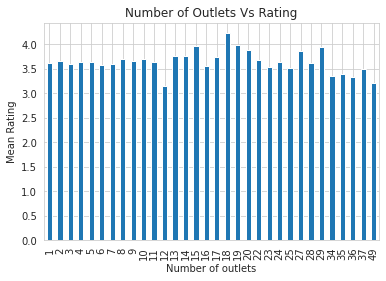

In [ ]:
#Grouping Restaurants with same number of outlet/frequency and for each frequency computing the mean for all the restaurants with same frequency value
df_res.groupby('Frequency')['Rating'].mean().plot.bar()
plt.title('Number of Outlets Vs Rating')
plt.ylabel('Mean Rating')
plt.xlabel('Number of outlets')

**Observation**

*   The general trend reveals that Rating value increase with increase in the  number of outlet upto a certain number of outlet value(~18) after which Rating value decreases with increase in the number of outlet.



Text(0.5, 0, 'Number of Outlets')

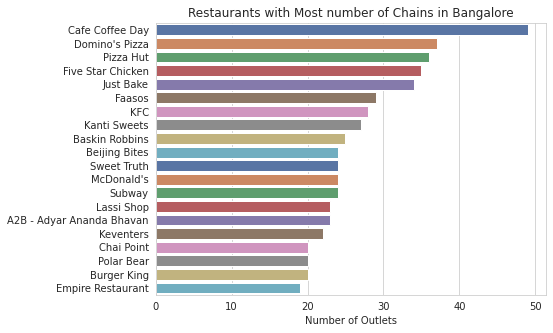

In [ ]:
#Plotting Restaurants with most number of chains
plt.figure(figsize=(7,5))
most_chain=df['name'].value_counts()[0:20]
sns.barplot(x=most_chain,y=most_chain.index,palette='deep')
plt.title('Restaurants with Most number of Chains in Bangalore')
plt.xlabel('Number of Outlets')

##Vote vs Rating Analysis

Text(0.5, 1.0, 'Rating Count')

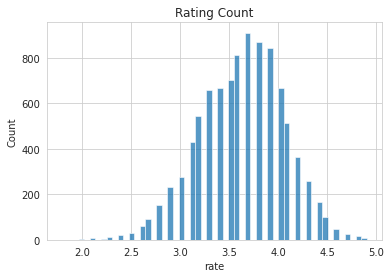

In [ ]:
sns.histplot(df['rate'])
plt.title('Rating Count')

Text(0.5, 1.0, 'Rating Distribution')

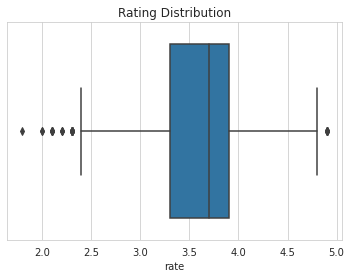

In [ ]:
sns.boxplot(df['rate'])
plt.title('Rating Distribution')

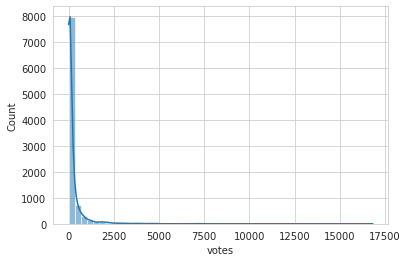

In [ ]:
sns.histplot(df['votes'],bins=50,kde=True)

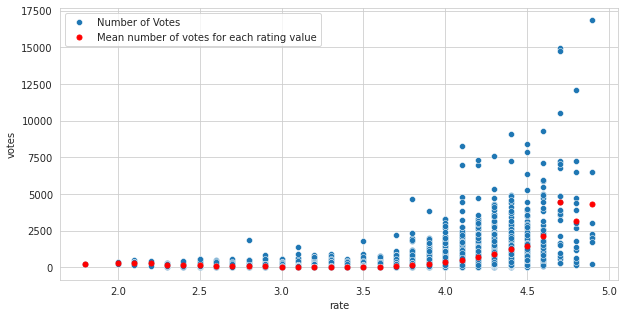

In [ ]:
df_rate_votes=df[['rate','votes']]
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_rate_votes['rate'],y=df_rate_votes['votes'])
df_rate_votes=df_rate_votes.groupby('rate').mean()
plt.scatter(x=df_rate_votes.index,y=df_rate_votes['votes'],c='red',s=25)
plt.legend(labels=['Number of Votes','Mean number of votes for each rating value'])

Upto certain value of rating (3.5), the votes seems to have no effect on the ratings. However, above 3.5 rating, mean votes increases with ratings or vice-versa.

##Online Order and Book Table 

Text(0.5, 1.0, 'Online Order')

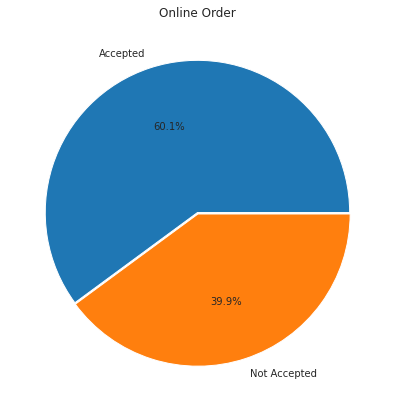

In [ ]:
online=df['online_order'].value_counts()
labels=['Accepted','Not Accepted']
plt.figure(figsize=(7,7))
plt.pie(online,labels=labels,explode=[0.0,0.01],autopct='%1.1f%%')
plt.title('Online Order')

Majority Restaurant accepts online order, however, quite a significant percent(40.3%) does not accept online order.

Text(0.5, 1.0, 'Book Table')

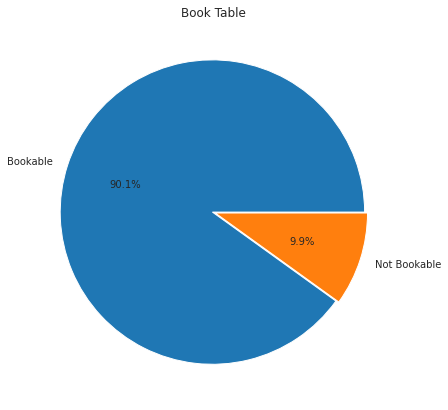

In [ ]:
book_table=df['book_table'].value_counts()
labels=['Bookable','Not Bookable']
plt.figure(figsize=(7,7))
plt.pie(book_table,labels=labels,explode=[0.01,0.01],autopct='%.1f%%')
plt.title('Book Table')

We see most restaurants listed in Zomato are Book-able.

##Approx Cost For Two

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]), <a list of 9 Text major ticklabel objects>)

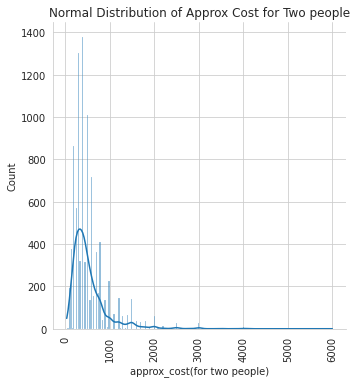

In [ ]:
#Normal Distribution of Approx_cost(for two people)
sns.displot(df['approx_cost(for two people)'],kde=True)
plt.title('Normal Distribution of Approx Cost for Two people')
plt.xticks(rotation=90)

Restaurant seems to have approx_cost(for two people) from just above 0 to 6000.<br>
However, most Restaurants seems to have approx_cost(for two people) less than 1000, with the mean being less than 500.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

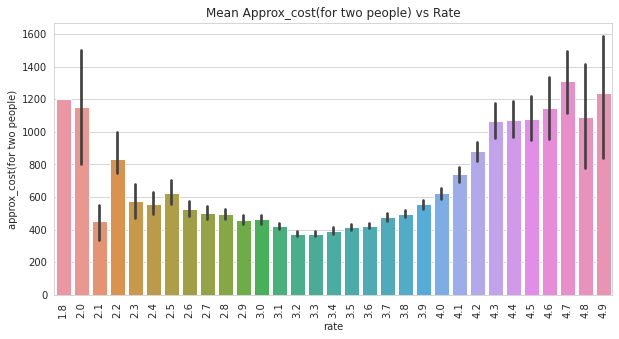

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['rate'],y=df['approx_cost(for two people)'])
plt.title('Mean Approx_cost(for two people) vs Rate')
plt.xticks(rotation=90)

**Observation**<br>
Although there is no clear cut trend visible for approx_cost for two people 
against rate upto the **rating value of 3.2**. However, above the rating value of 3.2, the approx_cost increases with increase in the rating. <br>The black line above each bar represents uncertainty. This uncertainty is low for the mid-rating values and high towards extreme.<br>
Thus we can conclude that *above a certain rating, higher cost restaurants seems to have higher ratings*.

##Top Restaurant Types 

Text(0.5, 1.0, 'Top Restaurant by number of outlets')

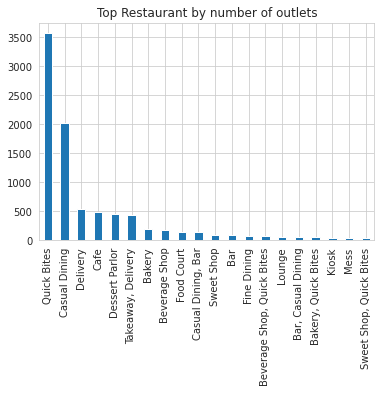

In [ ]:
#Top Restaurant types by number of outlets
rest_types=df['rest_type'].value_counts()[:20].plot.bar()
plt.title('Top Restaurant by number of outlets')

In terms of number of outlets, Quick Bites seems to be most common restaurant types. Along with it other most common restaurant types one can find in Bangalore are Casual Dining, Delivery, Cafe, Dessert Parlor,etc.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

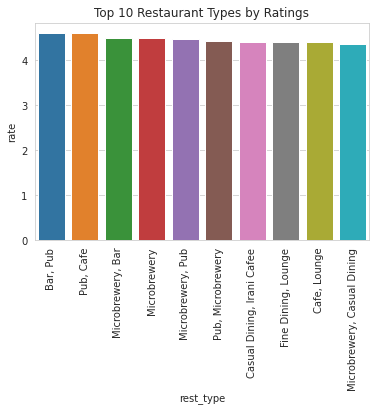

In [ ]:
#Top 10 Restaurant Type by Mean Rating
top10_typeby_rate=df.groupby('rest_type')['rate'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=top10_typeby_rate.index,y=top10_typeby_rate)
plt.title('Top 10 Restaurant Types by Ratings')
plt.xticks(rotation=90)

In terms of Restaurant performance and Rating, 'Bar,Pub' type seems to do more good than others. Other top performing restaurant types in Bangalore are Pub-Cafe, Microbrewery-Bar,etc. It seems the Pub-Brewery-Bar_Cafe seems to give an enjoyable and likeable experience in Bangalore.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

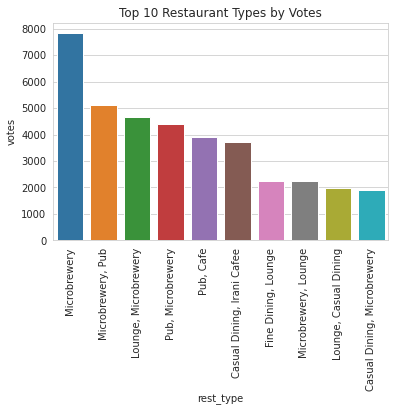

In [ ]:
#Top 10 restaurant type by Mean Votes
top10_typeby_vote=df.groupby('rest_type')['votes'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=top10_typeby_vote.index,y=top10_typeby_vote)
plt.title('Top 10 Restaurant Types by Votes')
plt.xticks(rotation=90)

Voting indicates the popularity of a restaurant. The most popular restaurant type in Bangalore are Microbrewery, Microbrewery-Pub, Lounge-Microbrewery. It seems to be again the Pub-Brewery-Bar-Cafe are the most popular restaurant types in Bangalore.

##Cuisine Type

In [ ]:
#Split restaurant record into different rows based on different cuisines value. Done by using .explode()
df_cuisine=df['cuisines'].str.split(',')
df_cuisine=df.assign(cuisines=df['cuisines'].str.split(',')).explode('cuisines')
df_cuisine.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6,28,080 32486296,Banashankari,Cafe,NaN,Cafe,900.0,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
0,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6,28,080 32486296,Banashankari,Cafe,NaN,Fast Food,900.0,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
1,https://www.zomato.com/bangalore/cuppa-1-banas...,"940, Shantha Complex, 20th Main, 2nd Stage, Ba...",Cuppa,No,No,3.3,23,+91 9591111123,Banashankari,Cafe,NaN,Cafe,550.0,"[('Rated 1.5', 'RATED\n This place was good t...",[],Cafes,Banashankari
1,https://www.zomato.com/bangalore/cuppa-1-banas...,"940, Shantha Complex, 20th Main, 2nd Stage, Ba...",Cuppa,No,No,3.3,23,+91 9591111123,Banashankari,Cafe,NaN,Fast Food,550.0,"[('Rated 1.5', 'RATED\n This place was good t...",[],Cafes,Banashankari
2,https://www.zomato.com/bangalore/beijing-bites...,"179, 1st Floor, Jawarlalnehru Road, BEML Layou...",Beijing Bites,Yes,No,3.7,679,080 28606888\r\n080 28606886,Rajarajeshwari Nagar,Casual Dining,"Momos, Dragon Chicken, Hakka Noodles, Chowmein...",Chinese,850.0,"[('Rated 3.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...",[],Delivery,Banashankari


In [ ]:
def remove_space(x):
  if isinstance(x, str):
    if x[0]==' ':
      return x[1:]
    else: return x
  else: return x

df_cuisine['cuisines'] = df_cuisine['cuisines'].apply(remove_space)
df_cuisine

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6,28,080 32486296,Banashankari,Cafe,NaN,Cafe,900.0,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
0,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6,28,080 32486296,Banashankari,Cafe,NaN,Fast Food,900.0,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
1,https://www.zomato.com/bangalore/cuppa-1-banas...,"940, Shantha Complex, 20th Main, 2nd Stage, Ba...",Cuppa,No,No,3.3,23,+91 9591111123,Banashankari,Cafe,NaN,Cafe,550.0,"[('Rated 1.5', 'RATED\n This place was good t...",[],Cafes,Banashankari
1,https://www.zomato.com/bangalore/cuppa-1-banas...,"940, Shantha Complex, 20th Main, 2nd Stage, Ba...",Cuppa,No,No,3.3,23,+91 9591111123,Banashankari,Cafe,NaN,Fast Food,550.0,"[('Rated 1.5', 'RATED\n This place was good t...",[],Cafes,Banashankari
2,https://www.zomato.com/bangalore/beijing-bites...,"179, 1st Floor, Jawarlalnehru Road, BEML Layou...",Beijing Bites,Yes,No,3.7,679,080 28606888\r\n080 28606886,Rajarajeshwari Nagar,Casual Dining,"Momos, Dragon Chicken, Hakka Noodles, Chowmein...",Chinese,850.0,"[('Rated 3.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
9476,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
9477,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,Finger Food,1500.0,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield
9477,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,North Indian,1500.0,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


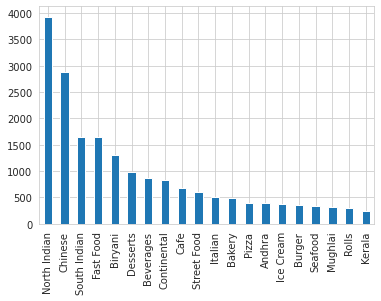

In [ ]:
#Top Cuisines based on the number of outlets
df_cuisine['cuisines'].value_counts()[:20].plot.bar()

The most popular cuisine among the outlets of Bangalore seems to be North Indian, followed by Chinese and South Indian.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

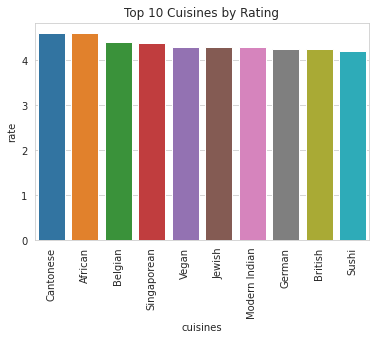

In [ ]:
#Top Cuisines based on the mean Rating value for each cuisine
top10_cuisinesby_rating=df_cuisine.groupby('cuisines')['rate'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=top10_cuisinesby_rating.index,y=top10_cuisinesby_rating)
plt.title('Top 10 Cuisines by Rating')
plt.xticks(rotation=90)

Surprisingly, the Top 10 cuisines by Rating are the Foreign ones. Seems like people has been more accepting and aprreciative of ***uncommon foreign cuisines***.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

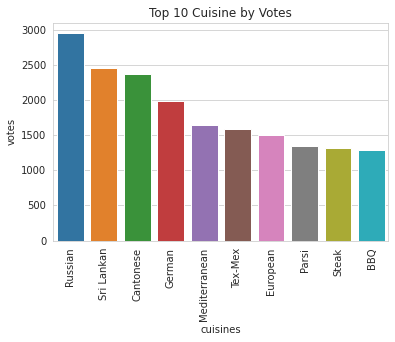

In [ ]:
#Top Cuisines based on the mean Votes for each cuisine in all restaurants
top10_cuisinesby_votes=df_cuisine.groupby('cuisines')['votes'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=top10_cuisinesby_votes.index,y=top10_cuisinesby_votes)
plt.title('Top 10 Cuisine by Votes')
plt.xticks(rotation=90)

Similar to the Top 10 by ratings, votes seems to accumulate in the uncommon foreign cuisines. People in Bangalore seems to have a broad taste for cuisines and definitely not limited to Indian ones.

##Region wise restaurant count on a *Map*

In [ ]:
#Creating DataFrame of Location and the number of restaurant counts in it
df_loc=pd.DataFrame(df['location'].value_counts())
df_loc=df_loc.reset_index()
df_loc.columns=['Location','Count']

In [ ]:
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp",timeout=10)
#Creating DataFrame containing the Latitude and Longitude of the Restaurant Location
latitude,longitude=[],[]
for i in df_loc['Location']:
  location=geolocator.geocode(i+', Bangalore')
  if location:
    latitude.append(geolocator.geocode(i+', Bangalore').latitude)
    longitude.append(geolocator.geocode(i+', Bangalore').longitude)
  else:
    latitude.append(np.nan)
    longitude.append(np.nan)

df_loc['Latitude'],df_loc['Longitude']=latitude,longitude
df_loc

,Location,Count,Latitude,Longitude
0,Whitefield,629,12.969637,77.749745
1,BTM,538,12.911276,77.604565
2,HSR,525,12.909234,77.639867
3,Marathahalli,512,12.955257,77.698416
4,Electronic City,458,12.848760,77.648253
...,...,...,...,...
87,Central Bangalore,2,13.010129,77.554801
88,Langford Town,2,12.957998,77.603731
89,Kengeri,1,12.917657,77.483757
90,Nagarbhavi,1,12.959618,77.511267


In [ ]:
df_loc.dropna()

,Location,Count,Latitude,Longitude
0,Whitefield,629,12.969637,77.749745
1,BTM,538,12.911276,77.604565
2,HSR,525,12.909234,77.639867
3,Marathahalli,512,12.955257,77.698416
4,Electronic City,458,12.848760,77.648253
...,...,...,...,...
87,Central Bangalore,2,13.010129,77.554801
88,Langford Town,2,12.957998,77.603731
89,Kengeri,1,12.917657,77.483757
90,Nagarbhavi,1,12.959618,77.511267


In [ ]:
#Mapping the Location wiht marker size indicating the count of restaurant in the Location
fig=px.scatter_mapbox(df_loc,
                      lat=df_loc['Latitude'],
                      lon=df_loc['Longitude'],
                      zoom=10.8,
                      color=df_loc['Location'],
                      size=df_loc['Count'],
                      color_continuous_scale=px.colors.cyclical.IceFire,
                      opacity=0.85,
                      width=1200,
                      height=900,
                      title='Region Wise Restaurant Count')
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

Restaurant Localities are dominated in South and Eastern part of Bangalore. Whitefield, Marathahalli, HSR and BTM are the top locaalities in terms of restaurant numbers.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

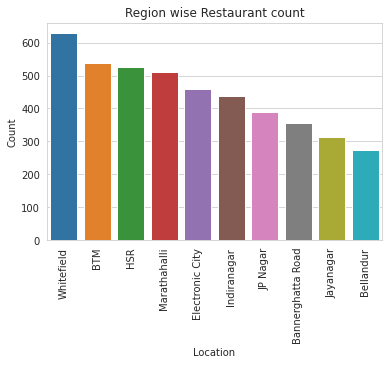

In [ ]:
#Top 10 Location based on the number of outlets in the location
top10_locby_outlets=df_loc.sort_values(by='Count',ascending=False)[:10]
sns.barplot(x=top10_locby_outlets['Location'],y=top10_locby_outlets['Count'])
plt.title('Region wise Restaurant count')
plt.xticks(rotation=90)

##Identifying Regions with more potential 

In [ ]:
#Creating a DataFrame having total votes from all restaurants in each location
df_loc_votes=pd.DataFrame(df.groupby('location')['votes'].sum())
df_loc_votes=df_loc_votes.reset_index()
df_loc_votes.columns=['Location','Votes']
df_loc_votes

,Location,Votes
0,BTM,71397
1,Banashankari,38496
2,Banaswadi,10727
3,Bannerghatta Road,52296
4,Basavanagudi,33479
...,...,...
87,West Bangalore,575
88,Whitefield,150090
89,Wilson Garden,1141
90,Yelahanka,88


In [ ]:
#Creating DataFrame(df_pot) with containing avg votes in each location 

df_pot=pd.merge(df_loc,df_loc_votes,on='Location',how='outer')
df_pot=df_pot.dropna()
df_pot['avg votes']=df_pot['Votes']/df_pot['Count']
df_pot

,Location,Count,Latitude,Longitude,Votes,avg votes
0,Whitefield,629,12.969637,77.749745,150090,238.616852
1,BTM,538,12.911276,77.604565,71397,132.708178
2,HSR,525,12.909234,77.639867,115790,220.552381
3,Marathahalli,512,12.955257,77.698416,137133,267.837891
4,Electronic City,458,12.848760,77.648253,55383,120.923581
...,...,...,...,...,...,...
87,Central Bangalore,2,13.010129,77.554801,400,200.000000
88,Langford Town,2,12.957998,77.603731,260,130.000000
89,Kengeri,1,12.917657,77.483757,74,74.000000
90,Nagarbhavi,1,12.959618,77.511267,10,10.000000


In [ ]:
#Mapping each location with marker size depending upon the average votes in the location
fig=px.scatter_mapbox(df_pot,
                      lat=df_pot['Latitude'],
                      lon=df_pot['Longitude'],
                      zoom=10.8,
                      color=df_pot['Location'],
                      size=df_pot['avg votes'],
                      color_continuous_scale=px.colors.cyclical.IceFire,
                      opacity=0.85,
                      width=1200,
                      height=900,
                      title='Region wise Average Votes in Restaurants')
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

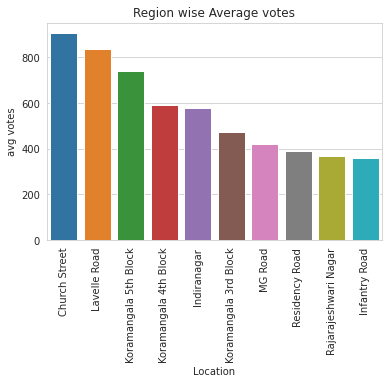

In [ ]:
#Top 10 location in Bangalore based on Average Votes
top10_locby_avgvotes=df_pot.sort_values(by='avg votes',ascending=False)[:10]
top10_locby_avgvotes[['Location','avg votes']]
sns.barplot(x=top10_locby_avgvotes['Location'],y=top10_locby_avgvotes['avg votes'])
plt.title('Region wise Average votes')
plt.xticks(rotation=90)

In [ ]:
#Creating DataFrame containing Restaurant with the Top5 cuisine Type(North Indian, Chinese,South Indian, Fast Food and Biriyani)
df_top5_cuisines=df_cuisine[df_cuisine['cuisines'].isin(df_cuisine['cuisines'].value_counts()[:5].index)]

#Create DataFrame with total number of votes for Top 5 Cuisines in each location  
df_cui_votes=pd.DataFrame(df_top5_cuisines.groupby(['location','cuisines'])['votes'].sum())
df_cui_votes=df_cui_votes.reset_index()
df_cui_votes.columns=['Location','Cuisine','Votes']

#Create DataFrame with  number of outlets for Top 5 Cuisines in each location
df_cui_count=pd.DataFrame(df_top5_cuisines.groupby(['location','cuisines']).size())
df_cui_count=df_cui_count.reset_index()
df_cui_count.columns=['Location','Cuisine','Count']

#Create DataFrame with average votes for Top 5 Cuisines in each location
df_cui_avgvote=pd.merge(df_cui_votes,df_cui_count,on=['Location','Cuisine'],how='outer')
df_cui_avgvote['Avg Vote']=df_cui_avgvote['Votes']/df_cui_avgvote['Count']
df_cui_avgvote

#Create DataFrame containing Top 5 locations for each of the Top 5 Cuisine
df_cui_avgvote=pd.DataFrame(df_cui_avgvote.sort_values(['Avg Vote'],ascending=False).groupby('Cuisine').head(5))
df_cui_avgvote

#Merge with the DataFrame containing the Latitude and Longitude of the Locations
df_cui_avgvote=pd.merge(df_cui_avgvote,df_loc,on='Location',how='outer')

#Drop Count column from the right Dataframe 
df_cui_avgvote=df_cui_avgvote.drop(['Count_x','Count_y'],axis=1).dropna()
df_cui_avgvote

,Location,Cuisine,Votes,Avg Vote,Latitude,Longitude
0,Church Street,Chinese,18389.0,1838.900000,12.975800,77.601690
1,Church Street,North Indian,19392.0,1020.631579,12.975800,77.601690
2,Church Street,South Indian,5507.0,786.714286,12.975800,77.601690
3,Koramangala 5th Block,North Indian,80817.0,1107.082192,12.934843,77.618977
4,Koramangala 5th Block,Chinese,54894.0,795.565217,12.934843,77.618977
5,Koramangala 5th Block,Biryani,18733.0,780.541667,12.934843,77.618977
6,Koramangala 5th Block,South Indian,10767.0,633.352941,12.934843,77.618977
7,Koramangala 5th Block,Fast Food,12942.0,331.846154,12.934843,77.618977
8,Lavelle Road,North Indian,9803.0,816.916667,12.975006,77.599822
9,Rajarajeshwari Nagar,Chinese,679.0,679.000000,12.927441,77.515522


In [ ]:
#Mapping each location with marker size depending upon the average votes in the location
fig=px.scatter_mapbox(df_cui_avgvote,
                      lat=df_cui_avgvote['Latitude'],
                      lon=df_cui_avgvote['Longitude'],
                      zoom=10.8,
                      hover_name=df_cui_avgvote['Location'],
                      color=df_cui_avgvote['Cuisine'],
                      size=df_cui_avgvote['Avg Vote'],
                      color_continuous_scale=px.colors.cyclical.IceFire,
                      opacity=0.95,
                      width=1200,
                      height=900,
                      title='Top 5 Locations for each of the Top 5 Cuisine in Bangalore')
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})
fig.show()